In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/datasets/7vote_csv.csv')
df.head()


Mounted at /content/drive


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN,republican
2,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y,democrat


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
columns = df.columns
df[columns] = df[columns].apply(LabelEncoder().fit_transform)
df.head

<bound method NDFrame.head of      handicapped-infants  water-project-cost-sharing  \
0                      0                           1   
1                      0                           1   
2                      2                           1   
3                      0                           1   
4                      1                           1   
..                   ...                         ...   
430                    0                           0   
431                    0                           0   
432                    0                           2   
433                    0                           0   
434                    0                           1   

     adoption-of-the-budget-resolution  physician-fee-freeze  el-salvador-aid  \
0                                    0                     1                1   
1                                    0                     1                1   
2                                    1                

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(df)
df = imp.transform(df)
df = pd.DataFrame(df, columns = columns)
print(df)

     handicapped-infants  water-project-cost-sharing  \
0                      0                           1   
1                      0                           1   
2                      2                           1   
3                      0                           1   
4                      1                           1   
..                   ...                         ...   
430                    0                           0   
431                    0                           0   
432                    0                           2   
433                    0                           0   
434                    0                           1   

     adoption-of-the-budget-resolution  physician-fee-freeze  el-salvador-aid  \
0                                    0                     1                1   
1                                    0                     1                1   
2                                    1                     2                1   
3  

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [ ]:
X_train = df_train.iloc[:, :-1]
X_test = df_test.iloc[:, :-1]
y_train = df_train.iloc[:, -1:]
y_test = df_test.iloc[:, -1:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)


DecisionTreeClassifier()

[Text(0.375, 0.9444444444444444, 'x[3] <= 0.5\ngini = 0.486\nsamples = 291\nvalue = [170, 121]'),
 Text(0.2, 0.8333333333333334, 'x[2] <= 0.5\ngini = 0.025\nsamples = 157\nvalue = [155, 2]'),
 Text(0.16, 0.7222222222222222, 'x[11] <= 1.5\ngini = 0.172\nsamples = 21\nvalue = [19, 2]'),
 Text(0.12, 0.6111111111111112, 'x[5] <= 0.5\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.08, 0.5, 'x[14] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.04, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.12, 0.3888888888888889, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.16, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.2, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.24, 0.7222222222222222, 'gini = 0.0\nsamples = 136\nvalue = [136, 0]'),
 Text(0.55, 0.8333333333333334, 'x[10] <= 0.5\ngini = 0.199\nsamples = 134\nvalue = [15, 119]'),
 Text(0.36, 0.7222222222222222, 'x[11] <= 0.5\ngini = 0.057\nsamples = 102\nva

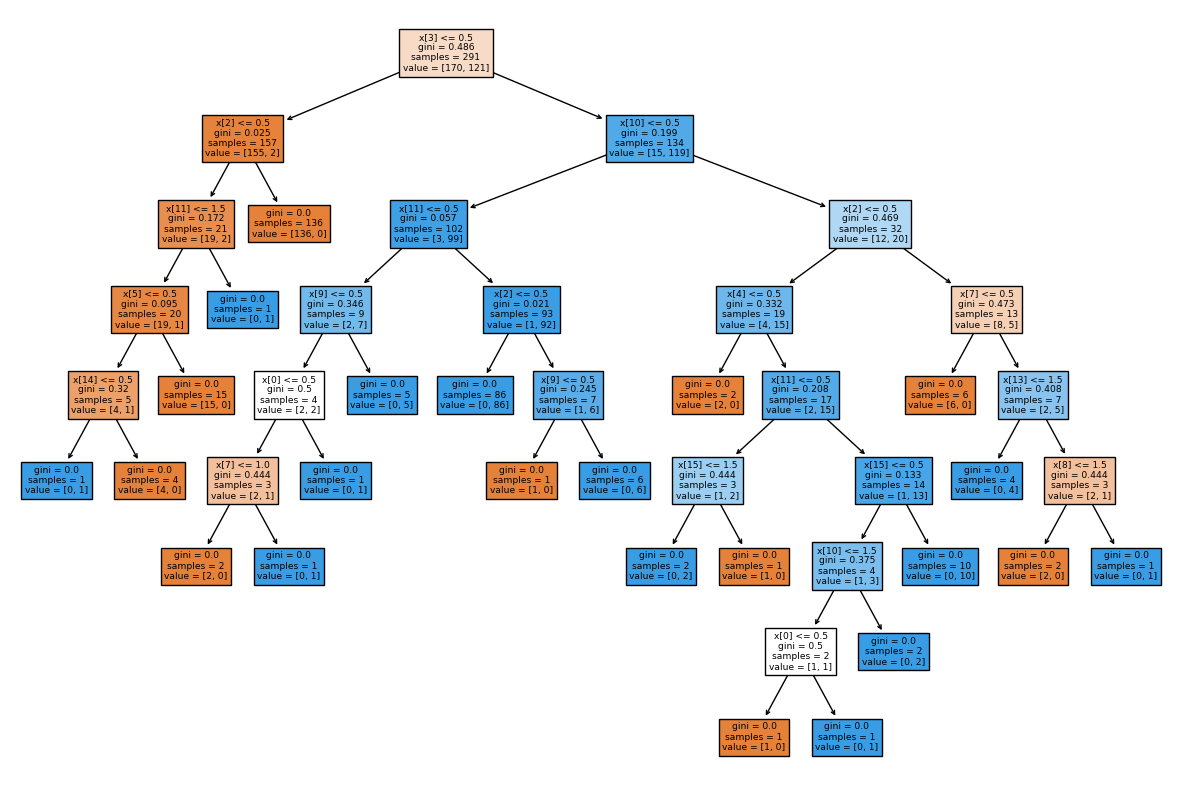

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [ ]:
y_pred=treemodel.predict(X_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_pred,y_test):.6f}')

accuracy: 0.895833


# Default Deciciotn Tree Reports

In [ ]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.95      0.90      0.92       102
           1       0.79      0.88      0.83        42

    accuracy                           0.90       144
   macro avg       0.87      0.89      0.88       144
weighted avg       0.90      0.90      0.90       144



In [ ]:
treemodel_post_pruning = DecisionTreeClassifier(max_depth=4)
treemodel_post_pruning.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
treemodel_post_pruning.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4)

[Text(0.4, 0.9, 'x[3] <= 0.5\ngini = 0.486\nsamples = 291\nvalue = [170, 121]'),
 Text(0.2, 0.7, 'x[2] <= 0.5\ngini = 0.025\nsamples = 157\nvalue = [155, 2]'),
 Text(0.15, 0.5, 'x[11] <= 1.5\ngini = 0.172\nsamples = 21\nvalue = [19, 2]'),
 Text(0.1, 0.3, 'x[5] <= 0.5\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.05, 0.1, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.15, 0.1, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 136\nvalue = [136, 0]'),
 Text(0.6, 0.7, 'x[10] <= 0.5\ngini = 0.199\nsamples = 134\nvalue = [15, 119]'),
 Text(0.4, 0.5, 'x[11] <= 0.5\ngini = 0.057\nsamples = 102\nvalue = [3, 99]'),
 Text(0.3, 0.3, 'x[9] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.25, 0.1, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.35, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5, 0.3, 'x[2] <= 0.5\ngini = 0.021\nsamples = 93\nvalue = [1, 92]'),


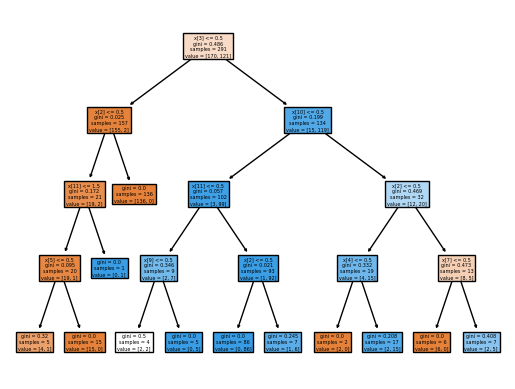

In [ ]:
tree.plot_tree(treemodel_post_pruning,filled=True)


In [ ]:
y_pred_post_pruning =treemodel_post_pruning.predict(X_test)


In [ ]:
print(f'accuracy: {accuracy_score(y_pred_post_pruning,y_test):.6f}')


accuracy: 0.930556


# Post Pruning Deciciotn Tree Reports

In [ ]:
print(classification_report(y_pred_post_pruning,y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        95
           1       0.91      0.88      0.90        49

    accuracy                           0.93       144
   macro avg       0.93      0.92      0.92       144
weighted avg       0.93      0.93      0.93       144



In [ ]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8],
  'max_features':['auto', 'sqrt', 'log2']

}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
treemodel_pre_pruninig=DecisionTreeClassifier()
cv=GridSearchCV(treemodel_pre_pruninig,param_grid=parameter,cv=5,scoring='accuracy')


In [ ]:
cv.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [ ]:
y_pred_pre_pruning=cv.predict(X_test)


In [ ]:
print(f'accuracy: {accuracy_score(y_pred_pre_pruning,y_test):.6f}')

accuracy: 0.902778


# PrePruning Decision Tree Report

In [ ]:
print(classification_report(y_pred_pre_pruning,y_test))


              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       186
         1.0       0.83      0.91      0.87        32
         2.0       1.00      0.38      0.55         8

    accuracy                           0.94       226
   macro avg       0.93      0.75      0.79       226
weighted avg       0.94      0.94      0.93       226



In [ ]:
treemodel_cost_complexity=DecisionTreeClassifier()
path = treemodel_cost_complexity.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [ ]:
ccp_alphas

array([0.        , 0.00212731, 0.00287331, 0.0032646 , 0.00333535,
       0.0035207 , 0.0045819 , 0.00523646, 0.00957518, 0.01001214,
       0.01999403, 0.38070012])

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.3807001196425155


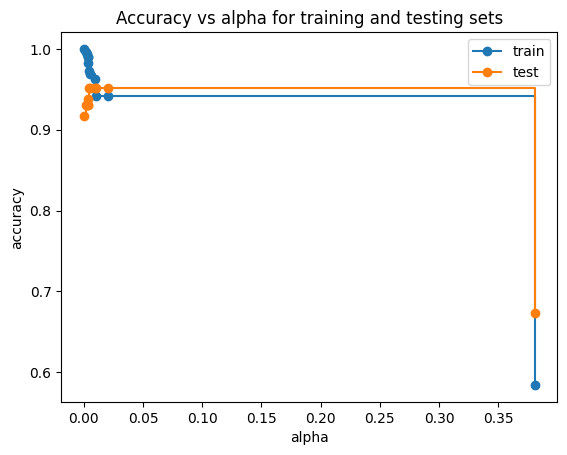

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
treemodel_cost_complexity = DecisionTreeClassifier(random_state=0, ccp_alpha=0.025)
treemodel_cost_complexity.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.025, random_state=0)

[Text(0.5, 0.75, 'x[3] <= 0.5\ngini = 0.486\nsamples = 291\nvalue = [170, 121]'),
 Text(0.25, 0.25, 'gini = 0.025\nsamples = 157\nvalue = [155, 2]'),
 Text(0.75, 0.25, 'gini = 0.199\nsamples = 134\nvalue = [15, 119]')]

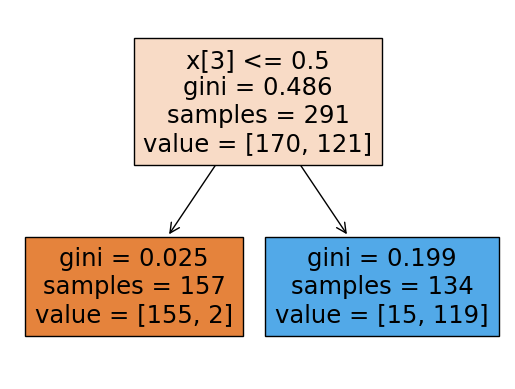

In [ ]:
tree.plot_tree(treemodel_cost_complexity,filled=True)

In [ ]:
y_pred_cost_complexity=treemodel_cost_complexity.predict(X_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_pred_cost_complexity,y_test):.6f}')


accuracy: 0.951389


# Cost Complexity Decision Tree Report

In [ ]:
print(classification_report(y_pred_cost_complexity,y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        90
           1       1.00      0.87      0.93        54

    accuracy                           0.95       144
   macro avg       0.96      0.94      0.95       144
weighted avg       0.95      0.95      0.95       144



In [ ]:
pip install chefboost

In [ ]:
from chefboost.training import Training

def findGain(threshold, d, column):
  idx = d[d[column] <= threshold].index
  tmp_d = d.copy()
  tmp_d[column] = '>' + str(threshold)
  tmp_d.loc[idx, column] = '<=' + str(threshold)
  config = {'algorithm': 'CART'}
  gain = Training.findGains(tmp_d, config)['gains'][column]
  return gain

In [ ]:
def change_to_class(columns, decision):
  binary_selection = {}
  for column in columns:
    df_temp = df_train.copy()
    df_temp = df_temp[[column, decision]]
    df_temp.rename(columns={decision : "Decision"}, inplace=True)
    uniques_values = sorted(df_temp[column].unique())
    theresold, mx_gain = 0, 1
    for i in uniques_values:
      gain = findGain(i, df_temp, column)
      if (mx_gain > gain):
        theresold = i
        mx_gain = gain
    binary_selection[column] = theresold
  return binary_selection
    # idx = classified_df[classified_df[column] <= mx_theresold].index
    # classified_df[column] = '>' + str(mx_theresold)
    # classified_df.loc[idx, column] = '<=' + str(mx_theresold)

In [ ]:
print(df_train)

     handicapped-infants  water-project-cost-sharing  \
109                    1                           2   
341                    0                           2   
145                    0                           0   
358                    1                           1   
209                    1                           1   
..                   ...                         ...   
71                     1                           1   
106                    0                           1   
270                    1                           1   
348                    1                           0   
102                    1                           0   

     adoption-of-the-budget-resolution  physician-fee-freeze  el-salvador-aid  \
109                                  1                     0                0   
341                                  1                     2                0   
145                                  1                     0                0   
358

In [ ]:
numerical_features = []
print(numerical_features)
binary_selection = change_to_class(numerical_features, 'roots')
print(binary_selection)

[]
{}


In [ ]:
class SelectRootDecisionTree():
  def __init__(self, criterion = "gini", max_depth = 20):
    self.criterion = criterion
    self.max_depth = max_depth

  def fit(self, X):
    self.X = X.copy();

  def predict(self, X_test):
    X_sub = {}
    DT_set = {}
    for feature in self.X.columns[0: -1]:
      X_sub[feature] = {}
      DT_set[feature] = {}
      if feature in numerical_features:
        X_sub[feature][0] = self.X[self.X[feature] < binary_selection[feature]].drop([feature], axis=1)
        X_sub[feature][1] = self.X[self.X[feature] >= binary_selection[feature]].drop([feature], axis=1)

        if 0 in list(X_sub[feature].keys()):
          if not X_sub[feature][0].empty:
            DT_set[feature][0] = DecisionTreeClassifier(max_depth = self.max_depth)
            Y_Sub = X_sub[feature][0].iloc[:,-1:]
            X_temp = X_sub[feature][0].iloc[:,:-1]
            DT_set[feature][0] = DT_set[feature][0].fit(X_temp, Y_Sub)
        if 1 in list(X_sub[feature].keys()):
          if not X_sub[feature][1].empty:
            DT_set[feature][1] = DecisionTreeClassifier(max_depth = self.max_depth)
            Y_Sub = X_sub[feature][1].iloc[:,-1:]
            X_temp = X_sub[feature][1].iloc[:,:-1]
            DT_set[feature][1] = DT_set[feature][1].fit(X_temp, Y_Sub)
      else:
        for label in np.unique(self.X[feature].values):
          X_sub[feature][label] = self.X[self.X[feature].eq(label)].drop([feature], axis=1)
          DT_set[feature][label] = DecisionTreeClassifier(max_depth = self.max_depth)
          Y_Sub = X_sub[feature][label].iloc[:,-1:]
          X_temp = X_sub[feature][label].iloc[:,:-1]
          DT_set[feature][label] = DT_set[feature][label].fit(X_temp, Y_Sub)

    predictions = []
    target = self.X.columns[-1:][0]
    # res = DT_set['Outlook'][1].predict(pd.DataFrame([row[1]],columns=X_test.columns).drop(['Outlook'], axis=1))

    for feature in X_test.columns:
      prediction = []
      for row in X_test.iterrows():
        label = row[1][feature]
        if feature in numerical_features:
          label = 1 if row[1][feature] >= binary_selection[feature] else 0
        if label not in list(X_sub[feature].keys()) or X_sub[feature][label].empty:
          prediction.append(0)
          continue;
        decisions = np.unique(X_sub[feature][label][target].values);
        if (len(decisions) == 1):
          prediction.append(decisions[0]);
          continue
        test_data = pd.DataFrame([row[1]],columns=X_test.columns).drop([feature], axis=1)
        res = DT_set[feature][label].predict(test_data)
        prediction.append(res[0])
      predictions.append(prediction)
    return predictions;
        # prediction.append()



In [ ]:
proposed_algo_1_dt = SelectRootDecisionTree(max_depth = 3)
proposed_algo_1_dt.fit(df_train)
print(X_test)
y_pred_proposed_algo_1 = proposed_algo_1_dt.predict(X_test)
print(y_pred_proposed_algo_1)

     handicapped-infants  water-project-cost-sharing  \
280                    0                           0   
78                     1                           1   
113                    0                           2   
253                    0                           1   
324                    0                           1   
..                   ...                         ...   
387                    1                           1   
391                    1                           1   
220                    0                           0   
157                    0                           1   
342                    0                           1   

     adoption-of-the-budget-resolution  physician-fee-freeze  el-salvador-aid  \
280                                  1                     0                0   
78                                   1                     0                1   
113                                  0                     1                1   
253

In [ ]:
from sklearn.metrics import recall_score
mx_recal, proposed_algo_result = 0, []
for feature_pred in y_pred_proposed_algo_1:
  # print(y_test_proposed_algo_1)
  recall = recall_score(feature_pred, y_test, average='macro')
  if (recall > mx_recal):
    proposed_algo_result = feature_pred
    mx_recal = recall
print(mx_recal)

0.9739583333333334


In [ ]:
print(f'accuracy: {accuracy_score(proposed_algo_result, y_test):.6f}')

accuracy: 0.979167


In [ ]:
print(classification_report(proposed_algo_result, y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        96
           1       0.98      0.96      0.97        48

    accuracy                           0.98       144
   macro avg       0.98      0.97      0.98       144
weighted avg       0.98      0.98      0.98       144

